In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [3]:
# Aprèn a realitzar mostreig de les dades amb Python.
# Objectius:
# -Preprocesar
# -Mostrejar

# Nivell 1
# - Exercici 1
# Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades
#generant una mostra aleatòria simple i una mostra sistemàtica.

In [4]:
df = pd.read_csv(r'MLB.txt', delimiter = "\t")

In [5]:
df.head(5)

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [6]:
df.shape

(828, 4)

In [7]:
df.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [8]:
# Mostra Aleàtoria Simple (SRS). Agafem una mostra de 10 mostres aleàtories:

srs_df = df.sample(10)

In [9]:
srs_df

,player,team,position,salary
762,Taylor Teagarden,Texas Rangers,Catcher,407.010
699,Felipe Lopez,St. Louis Cardinals,Shortstop,1000.000
655,Emmanuel Burriss,San Francisco Giants,Second Baseman,410.000
146,J.J. Putz,Chicago White Sox,Pitcher,3000.000
317,Jeff Fulchino,Houston Astros,Pitcher,425.000
549,Tyson Ross,Oakland Athletics,Pitcher,400.000
544,Jacob Fox,Oakland Athletics,Catcher,405.000
411,Randy Wolf,Milwaukee Brewers,Pitcher,8800.276
245,Magglio Ordonez,Detroit Tigers,Outfielder,17825.976
83,Josh Beckett,Boston Red Sox,Pitcher,12100.000


In [10]:
# Mostra sistemàtica. Comencem des del primer registre (df.index=0) tal com venien les dades per defecte,
# i anem agafant una mostra cada 5 (5th).
sys_sample_df = df.iloc[::5]
sys_sample_df

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
15,Blaine Boyer,Arizona Diamondbacks,Pitcher,725.0
20,Tony Abreu,Arizona Diamondbacks,Shortstop,407.0
...,...,...,...,...
805,Chien-Ming Wang,Washington Nationals,Pitcher,2000.0
810,Sean Burnett,Washington Nationals,Pitcher,775.0
815,Tyler Walker,Washington Nationals,Pitcher,650.0
820,Mike Morse,Washington Nationals,First Baseman,410.0


In [11]:
# Nivell 2
# - Exercici 2
# Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada
#i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).




In [12]:
# Mostra estratificada. Volem agafar una mostra de les dades estratificant-les segons les posicions de joc dels jugadors:

In [13]:
df['position'].unique()

array(['Pitcher', 'Catcher', 'First Baseman', 'Outfielder', 'Shortstop',
       'Second Baseman', 'Third Baseman', 'Designated Hitter',
       'Infielder'], dtype=object)

In [14]:
len(df['position'].unique())

9

In [15]:
# Abans d'extreure la mostra mirem quin % de jugadors hi ha de cada posició
df['position'].value_counts(normalize=True)

Pitcher              0.495169
Outfielder           0.178744
Catcher              0.080918
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.055556
First Baseman        0.050725
Designated Hitter    0.008454
Infielder            0.004831
Name: position, dtype: float64

In [16]:
# Extraiem la mostra, que sera del 25% respecte el total de les dades (test_size=0.75)
stratified_sample_train, stratified_sample_test = train_test_split(df, test_size=0.75, stratify=df[['position']])

In [17]:
stratified_sample_train

,player,team,position,salary
472,Jose Reyes,New York Mets,Shortstop,9375.0
517,Ramiro Pena,New York Yankees,Infielder,412.1
426,Claudio Vargas,Milwaukee Brewers,Pitcher,900.0
159,Donny Lucy,Chicago White Sox,Catcher,400.0
292,Dan Meyer,Florida Marlins,Pitcher,415.0
...,...,...,...,...
784,Casey Janssen,Toronto Blue Jays,Pitcher,700.0
231,Melvin Mora,Colorado Rockies,Third Baseman,1275.0
536,Brett Anderson,Oakland Athletics,Pitcher,410.0
584,Brendan Donnelly,Pittsburgh Pirates,Pitcher,1350.0


In [18]:
stratified_sample_test

,player,team,position,salary
657,Waldis Joaquin,San Francisco Giants,Pitcher,400.500
344,John Parrish,Kansas City Royals,Pitcher,600.000
298,Carlos Lee,Houston Astros,Outfielder,19000.000
238,Dexter Fowler,Colorado Rockies,Outfielder,406.000
35,Matt Diaz,Atlanta Braves,Outfielder,2550.000
...,...,...,...,...
579,Akinori Iwamura,Pittsburgh Pirates,Second Baseman,4850.000
336,Jason Kendall,Kansas City Royals,Catcher,2250.000
478,Alex Cora,New York Mets,Infielder,1850.000
158,Randall Williams,Chicago White Sox,Pitcher,415.000


In [19]:
# Si ho hem fet bé la mostra hauria de contenir un % de jugadors amb la seva posició,
# igual o molt semblant al del total de les dades.

stratified_sample_train['position'].value_counts(normalize=True)

Pitcher              0.492754
Outfielder           0.178744
Catcher              0.082126
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.053140
First Baseman        0.053140
Designated Hitter    0.009662
Infielder            0.004831
Name: position, dtype: float64

In [20]:
# Tan en el train com en el test:
stratified_sample_test['position'].value_counts(normalize=True)

Pitcher              0.495974
Outfielder           0.178744
Catcher              0.080515
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.056361
First Baseman        0.049919
Designated Hitter    0.008052
Infielder            0.004831
Name: position, dtype: float64

In [21]:
df['position'] == 'Pitcher'

0       True
1       True
2      False
3       True
4      False
       ...  
823     True
824    False
825     True
826     True
827    False
Name: position, Length: 828, dtype: bool

In [24]:
# mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique). 
X =  df['position'] == 'Pitcher'
y = df['position'] == 'Infielder'
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ True  True False  True False  True False False False False  True  True
 False False False  True False  True  True  True False False  True  True
 False  True  True False  True  True  True False False  True False False
 False False False  True False  True  True False False  True  True  True
  True False False False False  True False False False  True False  True
 False False False  True False  True  True  True  True  True False  True
 False  True  True  True False False False  True False False False  True
 False  True False False  True False False False  True False  True False
 False  True  True  True  True  True  True False  True False  True  True
 False  True False False  True False  True  True False False  True  True
 False  True False False  True False  True  True False False  True  True
  True False  True  True  True False False  True False False  True False
  True False  True  True  True False False False  True  True False False
 False False  True False  True  True  True  True False False False False
  True False  True  True False False  True  True False  True False False
 False False  True False False  True False False  True  True False  True
 False False  True False  True False False False False  True  True  True
  True  True  True False False  True  True False False False  True  True
 False  True False  True  True  True  True False False  True False  True
 False False False False  True  True  True  True False False False False
  True  True  True  True False False False  True  True False  True  True
 False False  True  True False  True False  True  True  True False  True
  True  True False False  True False False  True False False False False
  True  True  True  True  True False  True False  True False False  True
 False  True False False  True  True  True False False False False  True
 False False  True False  True False  True  True False  True  True False
 False  True False False False  True  True  True False  True  True  True
 False False  True False  True False  True False  True  True False  True
 False  True  True False False False  True  True  True False False False
 False False False  True  True False False  True  True  True False  True
  True  True  True False  True False False False False False False False
  True  True  True  True False False False False  True False False  True
 False False False False  True  True  True False  True False False  True
  True False False False  True False  True  True  True  True False  True
  True  True False  True  True False  True  True  True  True False False
  True False False False False  True  True False  True  True False  True
 False False False  True False  True False False  True False  True False
 False False False  True  True  True False  True  True False False  True
  True False  True  True False  True  True False  True False  True False
  True  True False False False False False False  True  True False False
  True  True  True  True False False False False False  True False  True
  True False False  True False False  True  True False  True  True False
 False False False  True  True False False  True  True False  True  True
  True False False False  True False False False  True  True False False
  True  True  True  True  True  True False False  True False False  True
  True False  True  True False  True  True False False  True False  True
 False False  True False  True False  True False False  True  True  True
  True  True False  True False False False False  True False  True  True
  True  True  True False  True False  True False  True False False  True
  True  True  True False False False  True False False  True False  True
  True False  True  True False  True False  True  True  True False False
  True False False False False  True False  True False  True False  True
  True False  True False False  True  True  True False False  True  True
 False False  True False  True False False  True  True  True  True False
 False False False  True False False False False False  True  True False
 False  True False  True False  True False False  True False False  True
  True  True False False  True False  True False  True False  True False
 False False  True False  True False  True  True False  True False  True
  True  True False False False  True False False  True  True  True False
 False  True  True False False False False  True False  True  True False
  True False False  True  True  True False  True False  True False  True
 False  True False False  True False  True False  True False False  True
 False  True  True  True  True  True  True False False False False False
  True False False False  True  True False  True  True False  True  True
 False False False  True False False  True False False  True  True False
  True  True  True False  True False  True  True  True  True  True  True
  True False  True False  True False False False  True False False  True
 False  True  True False False  True  True  True False False False  True
  True False False  True False  True  True  True False  True  True False].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0, 0.5, 'Number of players')

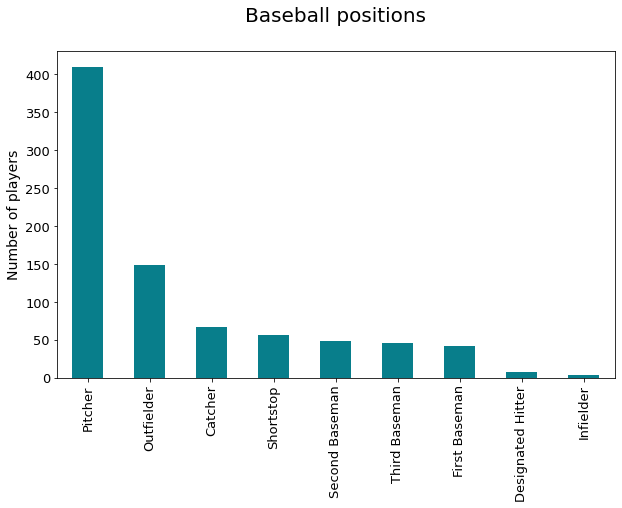

In [71]:
ax = df['position'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Baseball positions', size=20, pad=30)
ax.set_ylabel('Number of players', fontsize=14)


In [77]:
dummy_position_type = pd.get_dummies(df['position'], prefix='', drop_first=True)
merged = pd.concat([df,dummy_position_type], axis=1)
merged

,player,team,position,salary,_Designated Hitter,_First Baseman,_Infielder,_Outfielder,_Pitcher,_Second Baseman,_Shortstop,_Third Baseman
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0,0,0,0,0,1,0,0,0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0,0,0,0,0,1,0,0,0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0,0,0,0,0,0,0,0,0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0,0,0,0,0,1,0,0,0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0,0,0,0,0,1,0,0,0
824,Ian Desmond,Washington Nationals,Shortstop,400.0,0,0,0,0,0,0,1,0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0,0,0,0,0,1,0,0,0
826,Jesse English,Washington Nationals,Pitcher,400.0,0,0,0,0,1,0,0,0


In [79]:
X = merged.drop('position', axis=1)
y = merged['position']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 18.36
% Positive class in Test  = 16.43


In [ ]:

# Nivell 3
# - Exercici 3
# Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [85]:
import random

k=3
reservoir = []
for i, element in enumerate(df['salary']):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
print(reservoir)

[5000.0, 412.5, 1287.5]


In [ ]:
# PER FER
# - Repassar el tema del training test i de les X i y
# - Com fer l'Smote? Com s'enfoca en aquesta base de dades, agafant més de 2 valors (posicions)?
# - Entendre millor el reservoir i fer-lo jo mateix.